# Stance Detection on Tweets using NLP Methods

Note: This tutorial consists of two separate python notebooks. This is notebook is the first and, and the second notebook can be found [here](TODO).

1. First notebook (this one): Fine-tuning BERT models: include standard BERT and domain-specific BERT

2. Second notebook: Promoting large language models (LLMs): include ChatGPT, FLAN-T5 and different prompt types (zero-shot, few-shot, chain-of-thought)
- TODO: add link


## Introduction

**Objective of the tutorial**: This tutorial will guide you through the process of stance detection on tweets using two main approaches: fine-tuning a BERT model and using large language models (LLMs).

**Prerequisites**: 
- Basic Python skills (e.g., pandas, functions, classes)
- Basic ML knowledge (e.g., train-validation-test split, f1 score, forward pass, backpropagation) 
- Familiarity with NLP concepts is a plus, especially with transformers. No worries if you don't know them. There are some fantistic open-source tutorials, which I provide links throughout the text, and I will also breifly explain them in the tutorial.

****

## What is Stance Detection and Why is it Important?

Stance detection is an essential task in natural language processing that aims to determine the attitude expressed by an author towards a specific target, such as an entity, topic, or claim. The output of stance detection is typically a categorical label, such as "in-favor," "against," or "neutral," indicating the stance of the author in relation to the target. This task is critical for studying human belief dynamics, e.g., how people influence each other's opinions and how beliefs change over time.


For example [TODO]


There are two key challenges in stance detection, especially when working with large datasets like Twitter data. First, the underlying attitude expressed in the text is often subtle, which requires domain knowledge and context to correctly label the stance. Second, the corpus can be very large, with millions of tweets, making it impractical to manually annotate all of them.


<!-- <img src="images/stance_vs_sentiment.png" width="80%" height="80%"> -->
![stance_vs_sentiment](images/stance_vs_sentiment.png)


In this tutorial, we will focus on stance detection in the context of the "Abortion" topic using the SemEval-2016 dataset. We chose the abortion topic because it is currently a hotly debated issue, and it is important to understand public opinion on this matter. We will analyze a dataset containing tweets about abortion, with each tweet labeled as either in-favor, against, or neutral with respect to the topic. My goal is to develop a model that can accurately identify the stance expressed in these tweets.

To address these challenges, we will leverage advanced natural language processing (NLP) techniques like BERT and large language models (LLMs). BERT and LLMs are pre-trained on massive corpora, enabling them to capture subtle contextual information and better understand the nuances of language. With these NLP models, we can effectively adapt their general language understanding to the specific task of stance detection, even in cases where domain knowledge is required. This approach allows us to process large amounts of data with high accuracy while significantly reducing the need for manual annotation.

Note: The SemEval-2016 dataset contains tweets related to six different topics: Abortion, Atheism, Climate Change, Feminist Movement, Hillary Clinton, and Legalization of Abortion

![dataset](images/dataset_semeval_2016.png)

****


## Paradigm 1: using BERT for stance detection

In this section, I will briefly introduce BERT, a powerful NLP model that has been widely used in many NLP tasks. we will explain what BERT is, how it is trained, and how it can be used for stance detection. we will also show you how to fine-tune BERT for stance detection using python.

### What is BERT and how it works

BERT, which stands for _**B**idirectional **E**ncoder **R**epresentations from **T**ransformers_, is a groundbreaking natural language processing (NLP) model that has taken the world by storm. Created by researchers at Google in 2018, BERT has revolutionized the way we understand and analyze language. The model is designed to learn useful representations for words from unlabeled text, which can then be tailored, or, "fine-tuned" for a wide range of NLP tasks, such as stance detection, sentiment analysis, question-answering, among many.


> Note: "Unlabeled text" means that the text does not have any labels, such as the sentiment, or stance, of a tweet. This is in contrast to supervised learning, where the training data is labeled. In supervised learning, the model learns to predict the labels of the text of the training data. When pre-training BERT on unlabeled data, it learns to predict the randomly masked out words in a sentence (explained in details below).

In a nutshell, BERT is a powerful NLP model that leverages 1) the transformer architecture and 2) a pre-training and fine-tuning approach to achieve state-of-the-art performance on a wide range of tasks. we will explain these two concepts in more details below.

> Note: In this tutorial, my primary focus is on applying NLP models for stance detection, and I won't be elabortating all the details of BERT. If you're interested in learning more about BERT, I highly recommend checking out the excellent interactive tutorial available at http://jalammar.github.io/illustrated-bert/. This tutorial provides a thorough and visually engaging explanation of BERT's inner workings. Some of the plots in my tutorial are borrowed from this resource. 


#### Bidirectional Context: Understanding Context in Both Directions

Language is complex, and understanding it is no simple task. Traditional NLP models (e.g., RNN; no worries if you don't know what RNN is) have focused on reading text in one direction (e.g.,from left-to-right), making it difficult for them to grasp the full context when trying to understand a word. BERT, however, is designed to process text in both directions, allowing it to understand the meaning of words based on the words that come before and after them.

To explain how this is possible, we first need to understand what a transformer is, and specifically, the critical "self-attention mechanism" component that makes it possible for BERT to understand context in both directions.


<!-- ![BERT](images/bert_architecture.png) -->

****


#### A Powerful Backbone Architecture: Transformers with Self-Attention Mechanism

BERT is built upon the <u>**transformer architecture**</u>, the critical backbone of many state-of-the-art NLP models (including both BERT and the LLMs described in the second tutorial), was introduced by Vaswani et al. in their 2017 paper, "Attention Is All You Need."

The key component of the architecture is the "<u>**self-attention mechanism**</u>", which helps the model identify important parts of the input text and understand the relationships between words.


Let use a concrete example <ins>"_The animal didn't cross the street because **it** was too tired_"</ins> to illustrate the self-attention mechanism.

In this example, why does "<u>**it**</u>" refer to? Does it refer to the <u>animal</u> or the <u>street</u>? 

As humans, we understand that "<u>it</u>" refers to the "<u>animal</u>". However, it is not a simple task for a machine, especially given that the word "<u>street</u>" is closer to "<u>it</u>" than "<u>animal</u>" in the sentence. A naive machine may think that "<u>it</u>" refers to the "<u>street</u>" because the word "<u>street</u>" is closer to "<u>it</u>" than "<u>animal</u>".

We, as humans, know that "<u>it</u>" refers to the "<u>animal</u>" because we know that animals can get tired but not the  streets. We also know that beig too tired is a legitimate reason for not crossing the street. In summary, we can understand the meaning of the word "<u>it</u>" by taking into account of other words in the setence, or, in a techincal term, the "context".

With the help of the self-attention mechanism, a transformer model takes into account of the "**context**" of a word to understand its meaning. 

Let's use a diagram to show how this works. The figure below visualizes how this work. On the left-hand side, the sentence is the input to the self-attention mechanism, while on the right-hand side, the output is also the same sentence (hence the name "self-attention"). The lines between the input and the output dipicts the "attention weight" of each word. In this example, there are two "attention heads", the green one and the orange one. Each head represents a different way of understanding the meaning of the word "it".

Let's focus on the green one ("Head 1") now. This attention head has a high weight on the word "tired", which means that the attention weight of the word "tired" is higher than other words when the model is trying to understand the meaning of the word "it".

![images/self_attention_head_1.png](images/self_attention_head_1.png)


Let's now focus on the orange one ("Head 2"). This attention head has a high weight on the word "animal", indicating that this attention head cares more about the word "animal" when trying to understand the meaning of the word "it".

![images/self_attention_head_2.png](images/self_attention_head_2.png)


In the actual BERT model, there are 12 attention heads, meaning that the model has 12 different ways of understanding the meaning of any word in a sentence. After we combine the outputs of all 12 attention heads, we then get the representation of the word "it" in the sentence after this "attention layer".

In the BERT model, this attention mechanism is repeated 12 times (i.e., 12 attention layers). The final product after these 12 layers are the representation of the entire input sentence.

>  Note: The actual self-attention mechanism is more complicated, involving the query, key, and attention matrix. Here, I only explain role of attention, which is arguably the most critical component. Likewise, although the attention layers are the most noted component, it is not the only component. There are other building blocks like layer normalization, linear layers, positional encodings etc. If you are interested in learning more about transformers in detail, I highly recommend checking out the interactive tutorial on transformers (by Jay Alammar, the same author of the BERT tutorial linked above): http://jalammar.github.io/illustrated-transformer/. This tutorial provides a comprehensive and visually engaging explanation of the transformer architecture. Some plots in my tutorial are borrowed from this resource. Also note that there are different variants of BERT with different sizes of the transformer architecture. For example, BERT-Base has 12 attention layers, while BERT-Large has 24 attention layers. In this tutorial, we will be using BERT-Base as a running example.

****

<!-- ![images/bert_base.png](images/bert_base.png) -->


#### Pre-training and Fine-tuning: Learning from Lots of Text and Adapting to Specific Tasks

Now we know the architecture of BERT, which is a transformer model with 12 attention layers. But how does BERT learn to understand the meaning of words? An how can we use BERT to solve specific NLP tasks, say, stance detection? 

Note that BERT model contains about 110 million parameters, which requires a lot of data to train. How can we train BERT if the dataset for a specific task is small (the Abortion dataset we used in this tutorial only have 933 labeled tweets)?

One of the key secrets behind BERT's success is its ability to 1) learn from vast amounts of "unlabled text" and then 2) adapt that knowledge to specific tasks with labels. These two components correspond to the two stages when training a BERT model: 1) pre-training and 2) fine-tuning.

##### 1) Pre-training phase

During the initial pre-training phase, BERT is exposed to massive amounts of unlabeled text (the raw text itself without any annotation about sentiment, stance etc.). The standard BERT model was pretrained on the entire English Wikipedia and 11k+ online books, which in total contains about 3.3B words. 

Why do we want to pre-train BERT on these corpora, even though they are not related to the specific tasks we want to solve (i.e., the Abortion tweet dataset)? The answer is that the pre-training phase allows BERT to learn the general language understanding, for example, the meaning of words, the relationships between words, and the context of words.

In order to learn these general language understanding, in the pre-training phase, BERT uses two different tasks: 1) masked language modeling and 2) next sentence prediction. This phase allows BERT to learn the relationships between words even without any task-specific labels (e.g., stance labels are not needed for pre-training).


> Note: One caveat about pre-training is that, the more similar the pre-training corpus is to the task-specific corpus, the better the performance of BERT. For example, if you want to use BERT to solve a stance detection task on tweets about abortion, it is better to pre-train BERT on a corpus that is similar to the Abortion tweet dataset. For example, you can pre-train BERT on a corpus that contains tweets (rather than the original Wikipedia and online books corpus). This makes sense because the style of tweets is different from the style of Wikipedia and online books (e.g., they are shorter and more informal). More about this in the next section [Considering More Appropriate Pre-trained Models](#considering-more-appropriate-pre-trained-models).

![images/bert_pretrain.png](images/bert_pretrain.png)


##### Fine-tuning phase

After pre-training, BERT can be fine-tuned for a specific task with a smaller labeled dataset (e.g., tweets with stance labels). Fine-tuning involves updating the model's weights using the labeled data, allowing BERT to adapt its general language understanding to the specific task. This process is relatively fast and requires less training data compared to training a model from scratch.



![images/bert_fine_tune.png](images/bert_fine_tune.png)

[TODO] Should add a diagram.

****


### BERT's Sub-word Tokenization

One caveat of BERT is that it requires a special "subword-tokenization" process (i.e., WordPiece tokenization). That is, it dods not directly encode each individual word, but rather encode each word as a sequence of "sub-word tokens". For example, the word "university" can be broken down into the subwords "uni" and "versity," which are more likely to appear in the corpus than the word "university" itself. This process of breaking down words into subwords is called sub-word tokenization.

Sub-word tokenization is important for several reasons. Just to name two important ones:

#### Consistent Representation of Similar Words

Tokenization ensures that the text is represented in a consistent manner, making it easier for the model to learn and identify patterns in the data. By breaking the text into tokens, the model can focus on the essential units of meaning, allowing it to better understand and analyze the input.
For an example, let us consider the following two words that are commonly used in the abortion debate.: "pro-life" and "pro-choice". 


Tokenization can help standardize the text by breaking them down into smaller, overlapping tokens, i.e., ["pro", "-", "life"] and ["pro", "-", "choice"]. 

By representing the words as a sequence of tokens, the model can more effectively identify the commonality between them (the shared "pro-" prefix) while also distinguishing the unique parts ("life" and "choice"). This approach helps the model learn the relationships between word parts and the context (i.e., other words in the sentence) in a more generalizable way, while also capturing the nuances that make each word unique.

#### Handling Out-of-Vocabulary Words 

One of the challenges in NLP is dealing with words that the model has not encountered during training, also known as out-of-vocabulary (OOV) words. By using tokenization, BERT can handle OOV words more effectively. Subword tokenization breaks down words into smaller, meaningful parts that the model has likely seen before, allowing it to better understand and process previously unseen words.

For example, suppose we have a sentence containing a relatively newly-coined word: "pro-birth".

Here, the word "pro-birth" is a neologism that may not be present in the model's vocabulary during pre-training, particularly if the model was trained on older data. If we used a simple word-based tokenization, the model would struggle to understand this word. However, using a subword tokenization approach, the word can be broken down into smaller parts that the model has likely seen before:

["pro", "-", "birth"]

This breakdown allows the model to infer the meaning of the previously unseen word based on the subword components it has encountered during training. The model can recognize the "pro" prefix and the suffix "birth". This enables BERT to better understand these out-of-vocabulary words, especially those that are relatively new or coined, making it more robust and adaptable to a wide range of text inputs.

****

# Programming Exercise: Fine-tuning a BERT Model with HuggingFace

Now, let's fine-tune a standard BERT model using the HuggingFace Transformers library.


> Hugging Face, often called the "GitHub" for NLP models, provides an extensive open-source Transformers library and a model hub, making it easy to access, share, and implement state-of-the-art NLP models like BERT (and other open-source LLMs, more on this in the second tutorial). 


## Installing Packages from Huggingface and other Python Libraries


In [1]:
ON_COLAB = False
if ON_COLAB:
  !git clone https://github.com/yunshiuan/prelim_stance_detection.git
  !python -m pip install pandas datasets openai accelerate transformers transformers[sentencepiece] torch==1.12.1+cu113 -f https://download.pytorch.org/whl/torch_stable.html emoji -q
  %cd /content/prelim_stance_detection/scripts
else:
  %cd scripts

/home/sean/prelim_stance_detection/scripts


## Preprocess Data

In [37]:
%load_ext autoreload
%autoreload 2
import numpy as np
import emoji
import re
from collections import Counter
from sklearn.model_selection import StratifiedShuffleSplit
from os import listdir
from os.path import join

from data_processor import SemEvalDataProcessor
from utils import get_parameters_for_dataset, tidy_name


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
# set up 
SEED = 42
TOPIC_OF_INTEREST = "Abortion"
DATASET = "SEM_EVAL"
par = get_parameters_for_dataset(DATASET)

In [39]:
sem_eval_data = SemEvalDataProcessor()
df_raw_train = sem_eval_data._read_raw_data(read_train=True,read_test=False,topic=TOPIC_OF_INTEREST)
df_raw_test = sem_eval_data._read_raw_data(read_train=False,read_test=True,topic=TOPIC_OF_INTEREST)

In [40]:
df_raw_train.head()

,ID,Target,Tweet,Stance,partition
2211,2312,Legalization of Abortion,I really don't understand how some people are ...,AGAINST,train
2212,2313,Legalization of Abortion,Let's agree that it's not ok to kill a 7lbs ba...,AGAINST,train
2213,2314,Legalization of Abortion,@glennbeck I would like to see poll: How many ...,AGAINST,train
2214,2315,Legalization of Abortion,"Democrats are always AGAINST ""Personhood"" or w...",AGAINST,train
2215,2316,Legalization of Abortion,"@CultureShifting ""If you don't draw the line w...",NONE,train


In [41]:
df_raw_test.head()

,ID,Target,Tweet,Stance,partition
969,10970,Legalization of Abortion,Need a ProLife R.E. Agent? - Support a ProLife...,AGAINST,test
970,10971,Legalization of Abortion,Where is the childcare program @joanburton whi...,AGAINST,test
971,10972,Legalization of Abortion,I get several requests with petitions to save ...,AGAINST,test
972,10973,Legalization of Abortion,"we must always see others as Christ sees us,we...",AGAINST,test
973,10974,Legalization of Abortion,PRAYERS FOR BABIES Urgent prayer one in Lexing...,AGAINST,test


In [42]:
sem_eval_data.preprocess()
df_processed = sem_eval_data._read_preprocessed_data(topic=TOPIC_OF_INTEREST).reset_index(drop=True)
# save the partitions (train, dev, test) for later use
df_partitions = sem_eval_data.partition_processed_data(seed=SEED,verbose=False)

In [43]:
df_processed.head()

,ID,tweet,topic,label,partition
0,2312,i really don't understand how some people are ...,Abortion,AGAINST,train
1,2313,let's agree that it's not ok to kill a 7lbs ba...,Abortion,AGAINST,train
2,2314,@USERNAME i would like to see poll: how many a...,Abortion,AGAINST,train
3,2315,democrats are always against 'personhood' or w...,Abortion,AGAINST,train
4,2316,@USERNAME 'if you don't draw the line where i'...,Abortion,NONE,train


In [44]:
df_raw_train[df_raw_train.ID == "2319"].Tweet.to_list()[0]

'RT @createdequalorg: "We\'re all human, aren\'t we? Every human life is worth the same, and worth saving." -J.K. Rowling #... #SemST'

In [45]:
df_processed[df_processed.ID == "2319"].tweet.to_list()[0]

"'we're all human, aren't we? every human life is worth the same, and worth saving.' -j.k. rowling #..."

In [46]:
df_partitions[df_partitions.topic == TOPIC_OF_INTEREST].value_counts(['partition','label']).sort_index()

partition  label  
test       AGAINST    188
           FAVOR       46
           NONE        45
train      AGAINST    267
           FAVOR       83
           NONE       130
vali       AGAINST     67
           FAVOR       21
           NONE        32
dtype: int64

# Train a stadard BERT model

- Here, I use the BERT-base-uncased model, which is a standard BERT model with 12 attention layers and 110 million parameters.

In [47]:
import pandas as pd
import numpy as np
from os.path import join
import os
from glob import glob
import re
import datetime
import json
from transformers import TrainingArguments
from transformers import Trainer
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from transformers import AutoConfig
import torch as th

from shutil import rmtree

# from datasets.arrow_dataset import Dataset
from datasets.load import load_metric
from sklearn.model_selection import train_test_split
from sklearn.utils import resample


from data_processor import SemEvalDataProcessor
from utils import process_dataframe, preprocess_dataset, partition_and_resample_df, evaluate_trained_trainer_over_sets, func_compute_metrics_sem_eval, remove_saved_models_in_checkpoint, remove_checkpoint_dir, seed_all,convert_stance_code_to_text

## Set up

In [48]:
# use the standard bert model
ENCODER = "bert-base-uncased"
PATH_OUTPUT_ROOT = par.PATH_RESULT_SEM_EVAL_TUNING

In [49]:
device = th.device('cuda' if th.cuda.is_available() else 'cpu')
print('Using device:', device)
seed_all(SEED)


Using device: cuda


In [50]:
# specify the output path
path_run_this = join(PATH_OUTPUT_ROOT, ENCODER)
file_metrics = join(path_run_this, "metrics.csv")
file_confusion_matrix = join(path_run_this, "confusion_matrix.csv")
file_predictions = join(path_run_this, "predictions.csv")
print("path_run_this:", path_run_this)
print("file_metrics:", file_metrics)
print("file_confusion_matrix:", file_confusion_matrix)
print("file_predictions:", file_predictions)


path_run_this: /home/sean/gda-covid-tweets/results/semeval_2016/tuning/bert-base-uncased
file_metrics: /home/sean/gda-covid-tweets/results/semeval_2016/tuning/bert-base-uncased/metrics.csv
file_confusion_matrix: /home/sean/gda-covid-tweets/results/semeval_2016/tuning/bert-base-uncased/confusion_matrix.csv
file_predictions: /home/sean/gda-covid-tweets/results/semeval_2016/tuning/bert-base-uncased/predictions.csv


In [51]:
# Get the DataProcessor for the dataset and input/output paths
data_processor = SemEvalDataProcessor()
func_compute_metrics = func_compute_metrics_sem_eval()
file_processed = data_processor._get_file_processed_default(topic=TOPIC_OF_INTEREST)
df_partitions = data_processor.read_partitions(topic=TOPIC_OF_INTEREST)

In [52]:
# Load the preprocessed data and the partitions
df = process_dataframe(input_csv=file_processed,
                        dataset=DATASET)
# upsample the minority class
dict_df = partition_and_resample_df(df, SEED, "single_domain",
                                    factor_upsample=1,
                                    read_partition_from_df=True,
                                    df_partitions=df_partitions)

## Load the tokenizer and tokenize the tweets

Recall that BERT requires a special "subword-tokenization" process (i.e., WordPiece tokenization). That is, it does not directly encode each individual word, but rather encode each word as a sequence of "sub-word tokens". For example, the word "university" can be broken down into the subwords "uni" and "versity," which are more likely to appear in the corpus than the word "university" itself. This process of breaking down words into subwords is called sub-word tokenization.

In [53]:
# load the tokenizer and preprocess the data
tokenizer = AutoTokenizer.from_pretrained(ENCODER)
dict_dataset = dict()
for data_set in dict_df:
    dict_dataset[data_set] = preprocess_dataset(dict_df[data_set],
                                                tokenizer,
                                                keep_tweet_id=True,
                                                col_name_tweet_id=par.TEXT_ID)

In [54]:
# the processed data set has the following structure
# - text: the text of each tweet
# - label: the label of each stance
# - input_ids: the "token ids" of each tweet
dict_dataset["train_upsampled"]

Dataset({
    features: ['text', 'ID', 'label', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 801
})

### Let look at one example tweet after tokenization

The sentence "<u>_i really don't understand how some people are pro-choice. a life is a life no matter if it's 2 weeks old or 20 years old._</u>" is converted into the following tokens ID:

_[101, 1045, 2428, 2123, 1005, 1056, 3305, 2129, 2070, 2111, 2024, 4013, 1011, 3601, 1012, 1037, 2166, 2003, 1037, 2166, 2053, 3043, 2065, 2009, 1005, 1055, 1016, 3134, 2214, 2030, 2322, 2086, 2214, 1012,  102]_

> The "0" at the end are the padding tokens. They not used to train the model. Rather, they are used to make all the tweets within a batch have the same length. This is a common practice when training neural network models using batches.

TODO: decode each token ID to the actual token.

In [55]:
print("The original text of this tweet: \n {}".format(dict_dataset["train_upsampled"]["text"][0]))
print("The label of this tweet: \n {}".format(convert_stance_code_to_text(
    dict_dataset["train_upsampled"]["label"][0].item(), DATASET)))
print("The token ids of this tweet: \n{}".format(dict_dataset["train_upsampled"]["input_ids"][0]))

The original text of this tweet: 
 i really don't understand how some people are pro-choice. a life is a life no matter if it's 2 weeks old or 20 years old.
The label of this tweet: 
 AGAINST
The token ids of this tweet: 
tensor([ 101, 1045, 2428, 2123, 1005, 1056, 3305, 2129, 2070, 2111, 2024, 4013,
        1011, 3601, 1012, 1037, 2166, 2003, 1037, 2166, 2053, 3043, 2065, 2009,
        1005, 1055, 1016, 3134, 2214, 2030, 2322, 2086, 2214, 1012,  102,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,   

The tokens ID can be converted back to the original tokens, also using the tokenizer:

In [56]:
# "decode" the token ids back to the original text
tokenizer.decode(dict_dataset["train_upsampled"]["input_ids"][0],skip_special_tokens=True)

"i really don't understand how some people are pro - choice. a life is a life no matter if it's 2 weeks old or 20 years old."

In [57]:
# specify the training arguments
training_args = TrainingArguments(
    # dir to save the model checkpoints
    output_dir=path_run_this,
    # how often to evaluate the model on the eval set
    # - logs the metrics on vali set
    evaluation_strategy="epoch",
    # how often to log the training process to tensorboard
    # - only log the train loss , lr, epoch etc info and not the metrics
    logging_strategy="epoch",
    # how often to save the model on the eval set
    # - load_best_model_at_end requires the save and eval strategy to match
    save_strategy="epoch",
    # limit the total amount of checkpoints. deletes the older checkpoints in output_dir.
    save_total_limit=1,
    # initial learning rate for the adamw optimizer
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed=SEED,
    data_seed=SEED,
    # retain the best model (evaluated by the metric on the eval set)
    load_best_model_at_end=True,
    metric_for_best_model="f1_macro",
    # number of updates steps to accumulate the gradients for, before performing a backward/update pass
    gradient_accumulation_steps=1,
    # # use PyTorch's AdamsW optimizer instead of the default HuggingFace's one
    # # - https://github.com/huggingface/transformers/issues/14539
    optim="adamw_torch",
    report_to="none"
)      

In [58]:
# load the pretrained model
model = AutoModelForSequenceClassification.from_pretrained(ENCODER,
                                                          num_labels = par.DICT_NUM_CLASS[DATASET])

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [59]:
# Specify the trainer
trainer = Trainer(model=model, args=training_args,
                  train_dataset=dict_dataset["train_upsampled"],
                  eval_dataset=dict_dataset["vali_raw"],
                  compute_metrics=func_compute_metrics
                  )

In [60]:
# Train the model
trainer.train()

/home/sean/miniconda3/envs/prelim/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,F1 Macro,F1 Class 0,F1 Class 1,F1 Class 2,Accuracy,Recall Macro,Recall Class 0,Recall Class 1,Recall Class 2,Precision Macro,Precision Class 0,Precision Class 1,Precision Class 2
1,1.052800,1.021919,0.502849,0.564103,0.407407,0.537037,0.516667,0.548048,0.687500,0.523810,0.432836,0.506304,0.478261,0.333333,0.707317
2,0.847100,0.903755,0.632718,0.676923,0.526316,0.694915,0.650000,0.671242,0.687500,0.714286,0.611940,0.629085,0.666667,0.416667,0.803922
3,0.646100,0.833841,0.623618,0.666667,0.510638,0.693548,0.650000,0.643990,0.718750,0.571429,0.641791,0.612515,0.621622,0.461538,0.754386


/home/sean/miniconda3/envs/prelim/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/home/sean/miniconda3/envs/prelim/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


TrainOutput(global_step=78, training_loss=0.8486684897007086, metrics={'train_runtime': 38.1103, 'train_samples_per_second': 63.054, 'train_steps_per_second': 2.047, 'total_flos': 316130771400192.0, 'train_loss': 0.8486684897007086, 'epoch': 3.0})

In [61]:
%%capture --no-stderr
# evaluate on each partition
df_metrics, df_confusion_matrix, dict_predictions = \
    evaluate_trained_trainer_over_sets(trainer,
                                        DATASET,
                                        dict_dataset, "set",
                                        return_predicted_labels=True,
                                        keep_tweet_id=True,
                                        col_name_tweet_id=par.TEXT_ID)

/home/sean/miniconda3/envs/prelim/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/home/sean/miniconda3/envs/prelim/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/home/sean/miniconda3/envs/prelim/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/home/sean/miniconda3/envs/prelim/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarnin

In [62]:
# save the evaluation results
df_metrics.to_csv(file_metrics)

# save the confusion matrix
df_confusion_matrix.to_csv(file_confusion_matrix)

# save the predictions
# concatenate the predictions
# - "train_raw", "val_raw", "test_raw"
df_predictions = pd.concat([dict_predictions[key] for key in ["train_raw", "vali_raw", "test_raw"]], axis=0)
# save only the tweet_id and the predicted label
df_predictions = df_predictions[["ID", "predicted_label"]]
# convert the predicted label to the stance code
df_predictions["predicted_label"] = df_predictions["predicted_label"].apply(lambda x: convert_stance_code_to_text(x, DATASET))
df_predictions.to_csv(file_predictions, index=False)


In [63]:
# remove the saved model
remove_saved_models_in_checkpoint(path_run_this)
# remove the checkpoints
remove_checkpoint_dir(path_run_this)

# Considering More Appropriate Pre-trained Models

While the bert-base-uncased model is a good starting point, there are other pre-trained models specifically designed for social media text analysis with more related pre-training data. Two such models are BERTweet and polibertweet-mlm.

As mentioned earlier, if you want to use BERT to solve a stance detection task on tweets about abortion, it is better to pre-train BERT on a corpus that is more similar to the Abortion tweet dataset. Given that tweets are shorter and more informal than Wikipedia and online books, it makes sense to pre-train BERT on a corpus that contains tweets (rather than the original Wikipedia and online books corpus). This is exactly what BERTweet and polibertweet-mlm do.

## BERTweet

BERTweet is a pre-trained model specifically designed for processing and understanding Twitter data. It is trained on a large corpus of 850 million English tweets. As Twitter text contains unique language patterns, slang, and abbreviations, BERTweet is expected to perform better on stance detection tasks involving tweets compared to the general-purpose BERT model.

## Polibertweet-mlm


Polibertweet-mlm is a pre-trained model specifically designed for Twitter data, with a focus on political discourse. The dataset used for pretraining contains over 83 million English tweets related to the 2020 US Presidential Election. 

As the SemEval stance dataset also involves political topics, polibertweet-mlm is expected to be a suitable model for this stance detection task.

### Helper Function

Before we proceed with fine-tuning the models, we first create a wrapper function for each type of pretrained model. Using a wrapper function for the training pipeline streamlines the process of experimenting with different models, ensuring consistency, reproducibility, and maintainability.

In [77]:
def train(encoder):
    # specify the output paths
    encoder_name_tidy = tidy_name(encoder)
    path_run_this = join(PATH_OUTPUT_ROOT, encoder_name_tidy)
    file_metrics = join(path_run_this, "metrics.csv")
    file_confusion_matrix = join(path_run_this, "confusion_matrix.csv")
    file_predictions = join(path_run_this, "predictions.csv")

    # Load the preprocessed data and the partitions
    df = process_dataframe(input_csv=file_processed, dataset=DATASET)
    # upsample the minority class
    dict_df = partition_and_resample_df(df, SEED, "single_domain",
                                        factor_upsample=1,
                                        read_partition_from_df=True,
                                        df_partitions=df_partitions)
    # load the tokenizer and preprocess the data
    tokenizer = AutoTokenizer.from_pretrained(encoder)
    dict_dataset = dict()
    for data_set in dict_df:
        dict_dataset[data_set] = preprocess_dataset(dict_df[data_set],
                                                    tokenizer,
                                                    keep_tweet_id=True,
                                                    col_name_tweet_id=par.TEXT_ID)
    # specify the training arguments
    training_args = TrainingArguments(
        # dir to save the model checkpoints
        output_dir=path_run_this,
        evaluation_strategy="epoch",
        logging_strategy="epoch",
        save_strategy="epoch",
        save_total_limit=1,
        learning_rate=2e-5,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=16,
        num_train_epochs=3,
        weight_decay=0.01,
        seed=SEED,
        data_seed=SEED,
        load_best_model_at_end=True,
        metric_for_best_model="f1_macro",
        gradient_accumulation_steps=1,
        optim="adamw_torch",
        report_to="none"
    )

    # load the pretrained model
    model = AutoModelForSequenceClassification.from_pretrained(encoder,
                                                               num_labels=par.DICT_NUM_CLASS[DATASET])

    # specify the trainer
    trainer = Trainer(model=model, args=training_args,
                      train_dataset=dict_dataset["train_upsampled"],
                      eval_dataset=dict_dataset["vali_raw"],
                      compute_metrics=func_compute_metrics
                      )

    # train the model
    trainer.train()

    # evaluate on each partition
    df_metrics, df_confusion_matrix, dict_predictions = \
        evaluate_trained_trainer_over_sets(trainer,
                                           DATASET,
                                           dict_dataset, "set",
                                           return_predicted_labels=True,
                                           keep_tweet_id=True,
                                           col_name_tweet_id=par.TEXT_ID)
    # save the evaluation results
    df_metrics.to_csv(file_metrics)

    # save the confusion matrix
    df_confusion_matrix.to_csv(file_confusion_matrix)

    # save the predictions
    # concatenate the predictions
    # - "train_raw", "val_raw", "test_raw"
    df_predictions = pd.concat([dict_predictions[key] for key in ["train_raw", "vali_raw", "test_raw"]], axis=0)
    # save only the tweet_id and the predicted label
    df_predictions = df_predictions[["ID", "predicted_label"]]
    # convert the predicted label to the stance code
    df_predictions["predicted_label"] = df_predictions["predicted_label"].apply(lambda x: convert_stance_code_to_text(x, DATASET))
    df_predictions.to_csv(file_predictions, index=False)    

    # remove the saved model
    remove_saved_models_in_checkpoint(path_run_this)
    # remove the checkpoints
    remove_checkpoint_dir(path_run_this)

In [78]:
# BERTweet, having the same architecture as BERT-base (Devlin et al., 2019), is trained using the RoBERTa pre-training procedure
# - https://huggingface.co/docs/transformers/model_doc/bertweet
train("vinai/bertweet-base")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Some weights of the model checkpoint at vinai/bertweet-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.weight', 'lm_head.decoder.bias', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSe

Epoch,Training Loss,Validation Loss,F1 Macro,F1 Class 0,F1 Class 1,F1 Class 2,Accuracy,Recall Macro,Recall Class 0,Recall Class 1,Recall Class 2,Precision Macro,Precision Class 0,Precision Class 1,Precision Class 2
1,1.052200,0.995702,0.536147,0.478261,0.513514,0.616667,0.558333,0.600250,0.343750,0.904762,0.552239,0.614106,0.785714,0.358491,0.698113
2,0.856500,0.905358,0.521407,0.666667,0.470588,0.426966,0.508333,0.641154,0.687500,0.952381,0.283582,0.607732,0.647059,0.312500,0.863636
3,0.671100,0.833598,0.611601,0.712329,0.553846,0.568627,0.608333,0.700826,0.812500,0.857143,0.432836,0.623936,0.634146,0.409091,0.828571


/home/sean/miniconda3/envs/prelim/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/home/sean/miniconda3/envs/prelim/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/home/sean/miniconda3/envs/prelim/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


/home/sean/miniconda3/envs/prelim/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


/home/sean/miniconda3/envs/prelim/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


/home/sean/miniconda3/envs/prelim/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


/home/sean/miniconda3/envs/prelim/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


/home/sean/miniconda3/envs/prelim/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


In [79]:
# polibertweet-mlm
# - https://huggingface.co/kornosk/polibertweet-political-twitter-roberta-mlm
train("kornosk/polibertweet-mlm")

Some weights of the model checkpoint at kornosk/polibertweet-mlm were not used when initializing RobertaForSequenceClassification: ['lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.decoder.bias', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at kornosk/polibertweet-mlm and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.w

Epoch,Training Loss,Validation Loss,F1 Macro,F1 Class 0,F1 Class 1,F1 Class 2,Accuracy,Recall Macro,Recall Class 0,Recall Class 1,Recall Class 2,Precision Macro,Precision Class 0,Precision Class 1,Precision Class 2
1,1.052300,0.987180,0.466930,0.250000,0.463768,0.687023,0.550000,0.529932,0.156250,0.761905,0.671642,0.553819,0.625000,0.333333,0.703125
2,0.870500,0.920995,0.541591,0.509091,0.467532,0.648148,0.558333,0.605677,0.437500,0.857143,0.522388,0.594594,0.608696,0.321429,0.853659
3,0.699900,0.841638,0.635769,0.645161,0.533333,0.728814,0.658333,0.676232,0.625000,0.761905,0.641791,0.640020,0.666667,0.410256,0.843137


/home/sean/miniconda3/envs/prelim/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/home/sean/miniconda3/envs/prelim/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/home/sean/miniconda3/envs/prelim/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


/home/sean/miniconda3/envs/prelim/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


/home/sean/miniconda3/envs/prelim/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


/home/sean/miniconda3/envs/prelim/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


/home/sean/miniconda3/envs/prelim/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


/home/sean/miniconda3/envs/prelim/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


# Compare the performance of the different models

In [80]:
from result_summarizer import ResultSummarizer

In [85]:
PATH_OUTPUT_ROOT

'/home/sean/gda-covid-tweets/results/semeval_2016/tuning'

In [90]:
LIST_MODEL_NAME = ["bert-base-uncased","vinai_bertweet_base","kornosk_polibertweet_mlm"]
# summarize the results
# - bert-base-uncased
result_summarizer = ResultSummarizer(dataset=DATASET,
                                     list_version_output=LIST_MODEL_NAME,
                                     eval_mode="single_domain",
                                     model_type="single_domain_baseline",
                                     task=None,
                                     file_name_metrics="metrics.csv",
                                     file_name_confusion_mat="confusion_matrix.csv",
                                     path_input_root=PATH_OUTPUT_ROOT,
                                     path_output=join(PATH_OUTPUT_ROOT, "summary"))


In [92]:
# write the summary to a csv file
df_hightlight_metrics = result_summarizer.write_hightlight_metrics_to_summary_csv(
                        list_metrics_highlight=['f1_macro', 'f1_NONE', 'f1_FAVOR', 'f1_AGAINST'],
                        list_sets_highlight=['train_raw', 'vali_raw', 'test_raw'],
                        col_name_set="set")
# reorder the rows
df_hightlight_metrics['version'] = pd.Categorical(df_hightlight_metrics['version'], categories=LIST_MODEL_NAME, ordered=True)
df_hightlight_metrics = df_hightlight_metrics.sort_values('version').reset_index(drop=True)

In [93]:
# visualize the results and save the figures
plot_con_mat = result_summarizer.visualize_confusion_metrices_over_domains_comb(
    ["train_raw", "vali_raw", "test_raw"],
    preserve_order_list_sets=True)


<Figure size 1500x750 with 0 Axes>

<Figure size 1500x750 with 0 Axes>

<Figure size 1500x750 with 0 Axes>

In [94]:
# print the summary table
df_hightlight_metrics[["version","set","f1_macro","f1_NONE","f1_FAVOR","f1_AGAINST"]][df_hightlight_metrics.set.isin(["test_raw"])]

,version,set,f1_macro,f1_NONE,f1_FAVOR,f1_AGAINST
2,bert-base-uncased,test_raw,0.4549,0.4060,0.4056,0.5532
5,vinai_bertweet_base,test_raw,0.4904,0.5109,0.4819,0.4784
8,kornosk_polibertweet_mlm,test_raw,0.5200,0.4848,0.4697,0.6054


In [95]:
from IPython.display import Image, display

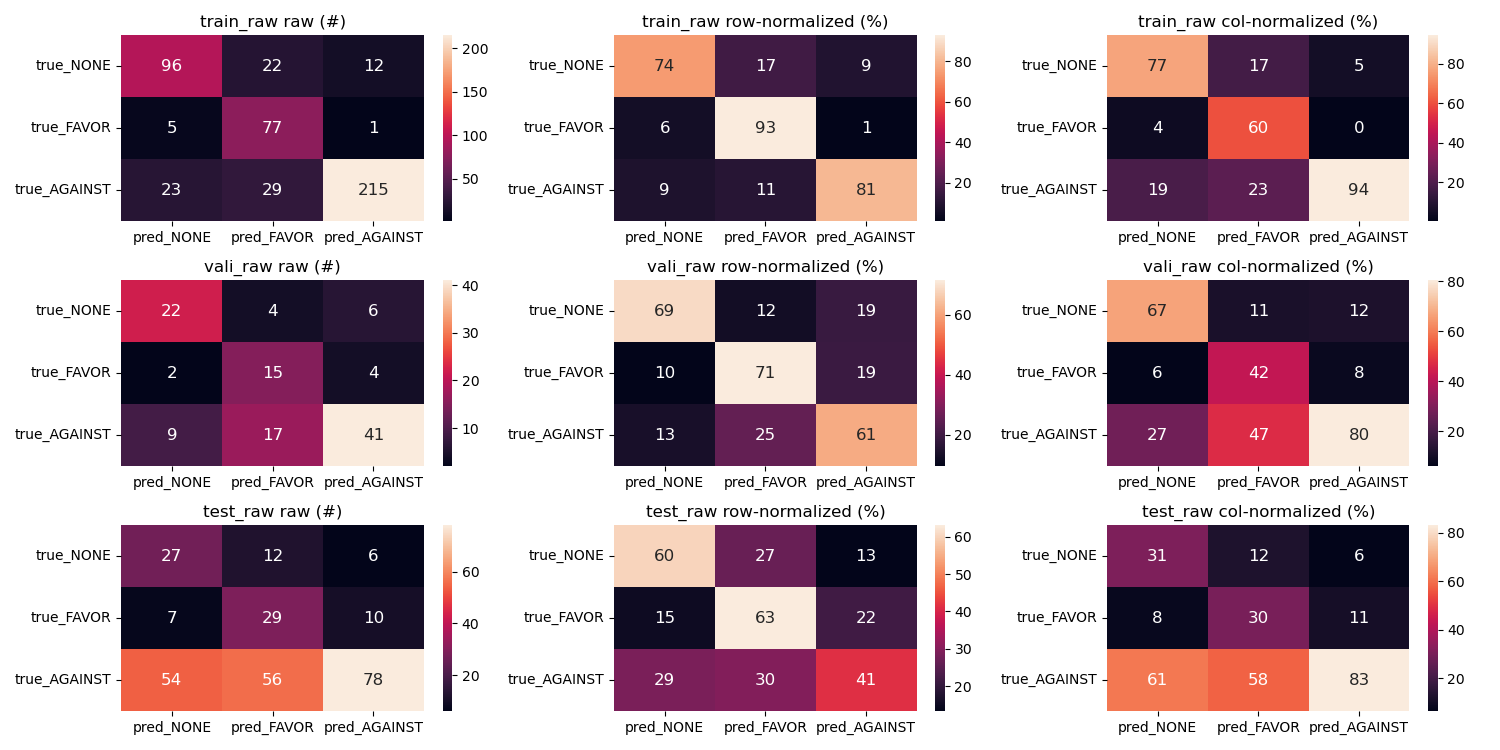

In [97]:
# read png file
display(Image(filename=join(PATH_OUTPUT_ROOT,"summary","bert-base-uncased_comb_confusion_mat.png")))

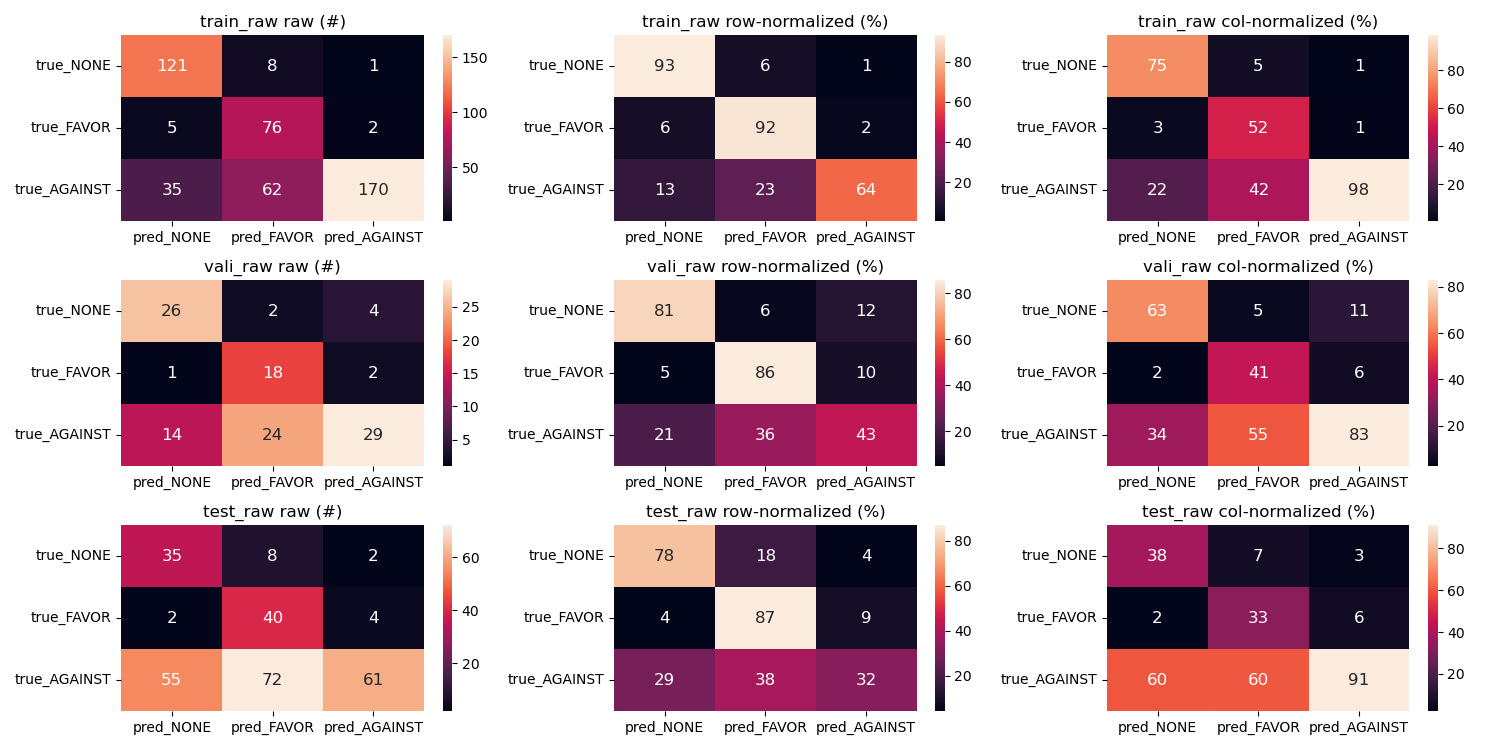

In [99]:
# read png file
display(Image(filename=join(PATH_OUTPUT_ROOT,"summary","vinai_bertweet_base_comb_confusion_mat.png")))

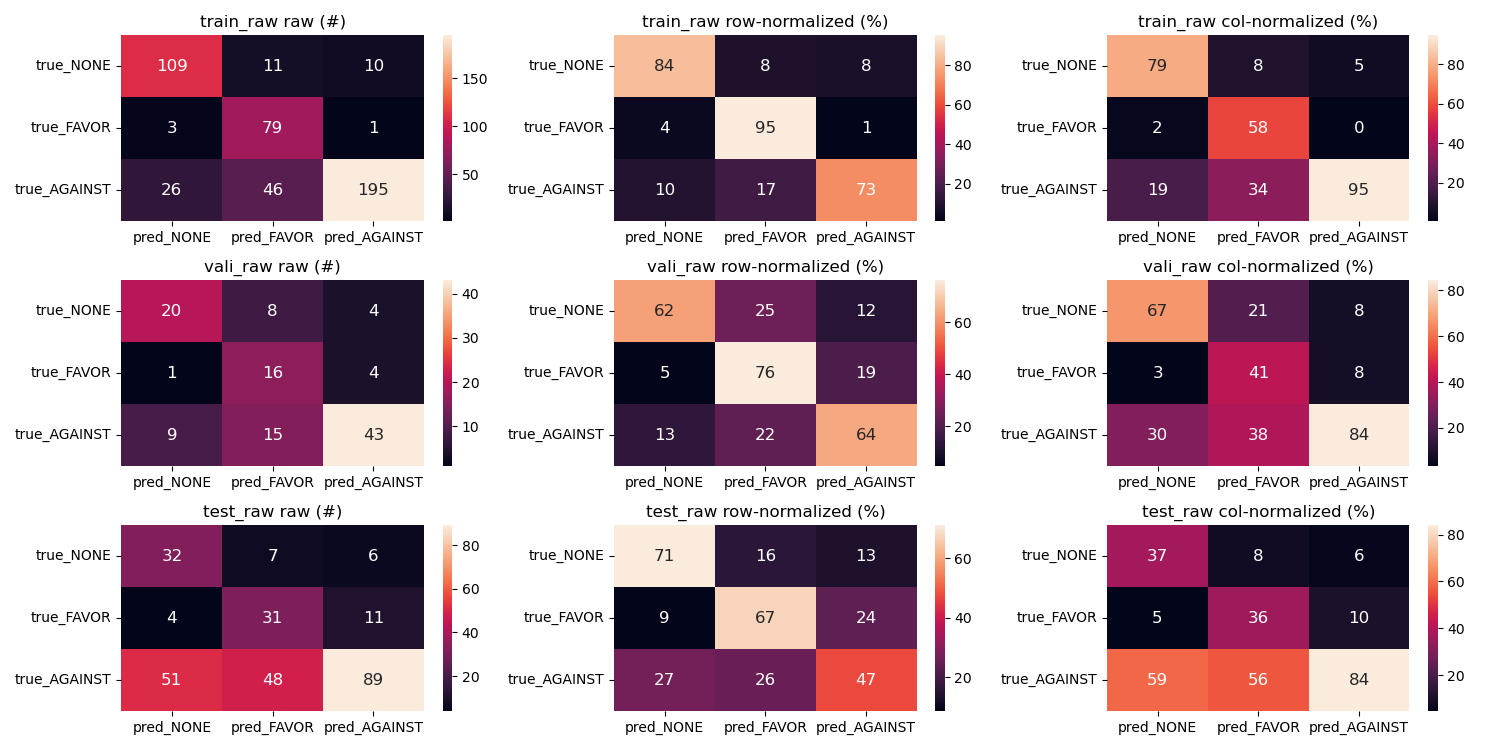

In [100]:
# read png file
display(Image(filename=join(PATH_OUTPUT_ROOT,"summary","kornosk_polibertweet_mlm_comb_confusion_mat.png")))